In [ ]:
import pandas as pd 

file = "C:/Users/Lenovo/Downloads/pib por municipio.xlsx"

df = pd.read_excel(file, nrows=100)

print(df.columns)

Index(['Ano', 'Código da Grande Região', 'Nome da Grande Região',
       'Código da Unidade da Federação', 'Sigla da Unidade da Federação',
       'Nome da Unidade da Federação', 'Código do Município',
       'Nome do Município', 'Região Metropolitana', 'Código da Mesorregião',
       'Nome da Mesorregião', 'Código da Microrregião', 'Nome da Microrregião',
       'Código da Região Geográfica Imediata',
       'Nome da Região Geográfica Imediata',
       'Município da Região Geográfica Imediata',
       'Código da Região Geográfica Intermediária',
       'Nome da Região Geográfica Intermediária',
       'Município da Região Geográfica Intermediária',
       'Código Concentração Urbana', 'Nome Concentração Urbana',
       'Tipo Concentração Urbana', 'Código Arranjo Populacional',
       'Nome Arranjo Populacional', 'Hierarquia Urbana',
       'Hierarquia Urbana (principais categorias)', 'Código da Região Rural',
       'Nome da Região Rural',
       'Região rural (segundo classificação d

In [8]:
# Importa as bibliotecas necessárias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# scikit-learn para os métodos opcionais.
#from sklearn.ensemble import IsolationForest

# Define o caminho do arquivo Excel.
file_path = "C:/Users/Lenovo/Downloads/pib por municipio.xlsx"

# Carrega os dados em um DataFrame.
# O parâmetro 'nrows=100' lê apenas as primeiras 100 linhas.
df_pib = pd.read_excel(file_path)

# Renomeia as colunas para facilitar o uso.
# As colunas são baseadas na lista que você forneceu do arquivo original.
# Note que a coluna 'populacao' não estava na sua lista, você precisará adicioná-la.
df_pib = df_pib.rename(columns={
    'Ano': 'ano',
    'Nome do Município': 'municipio',
    'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)': 'pib',
    # A coluna de população não está na sua lista. Você precisa adicionar o nome correto da coluna aqui.
    # Exemplo: 'Nome da Coluna da População': 'populacao'
    'Nome da Coluna da População': 'populacao',
    'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)': 'pib_per_capita'
})

# Verificação inicial: Exibe as primeiras linhas e informações sobre o DataFrame.
print("\nPrimeiras 5 linhas do DataFrame:")
print(df_pib.head())

print("\nInformações sobre o DataFrame:")
print(df_pib.info())

df_pib = df_pib[['ano', 'municipio', 'pib', 'pib_per_capita']]
# O exercício menciona que a coluna 'pib' está em R$ 1.000.
# O cálculo do PIB per capita requer a população.
# df_pib['pib_per_capita'] = (df_pib['pib'] * 1000) / df_pib['populacao']
# Remova o comentário da linha acima assim que tiver a coluna de população no DataFrame.


Primeiras 5 linhas do DataFrame:
    ano  Código da Grande Região Nome da Grande Região  \
0  2010                        1                 Norte   
1  2010                        1                 Norte   
2  2010                        1                 Norte   
3  2010                        1                 Norte   
4  2010                        1                 Norte   

   Código da Unidade da Federação Sigla da Unidade da Federação  \
0                              11                            RO   
1                              11                            RO   
2                              11                            RO   
3                              11                            RO   
4                              11                            RO   

  Nome da Unidade da Federação  Código do Município              municipio  \
0                     Rondônia              1100015  Alta Floresta D'Oeste   
1                     Rondônia              1100023       

In [10]:
df_pib=df_pib.query('ano==2021')



Estatísticas Descritivas do PIB e PIB Per Capita:
                pib  pib_per_capita
count  5.570000e+03     5570.000000
mean   1.617979e+06    33871.282487
std    1.377462e+07    41908.722752
min    1.805106e+04     5407.660000
25%    1.124903e+05    12831.152500
50%    2.531967e+05    23401.175000
75%    6.803901e+05    40807.450000
max    8.289806e+08   920833.970000


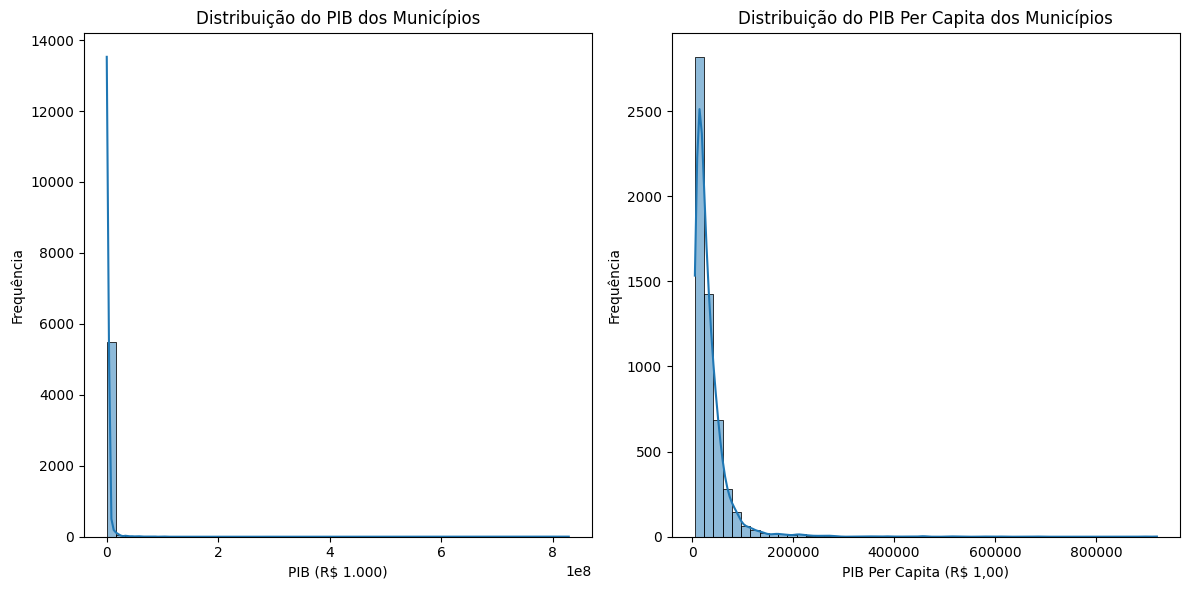

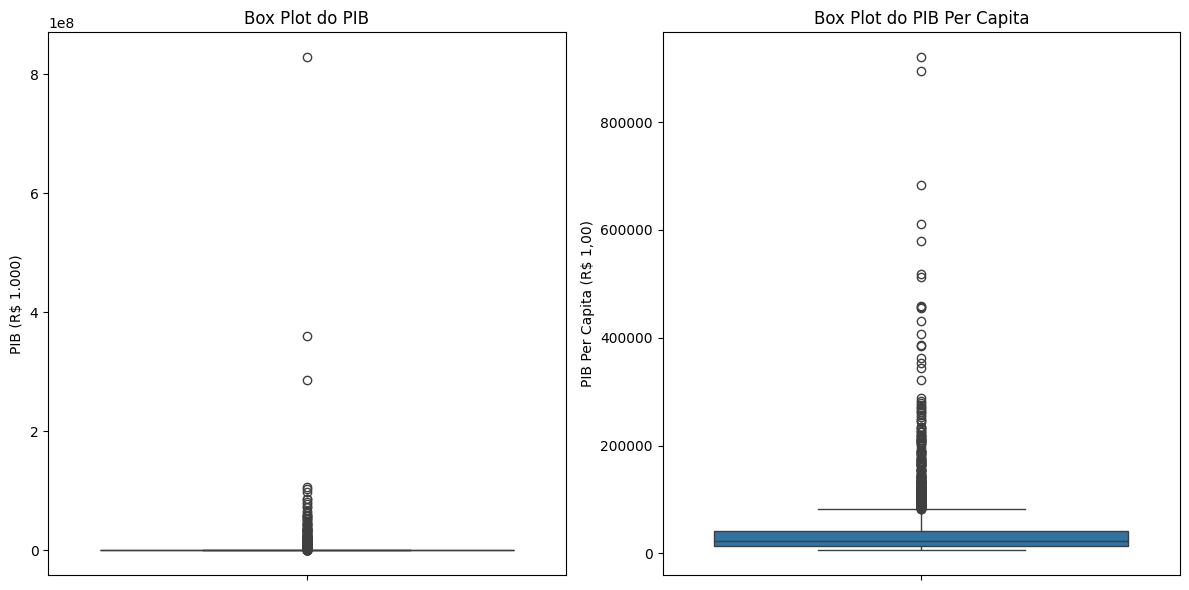

In [11]:
 # Cria o diretório 'plots' para salvar as visualizações.
if not os.path.exists('plots'):
    os.makedirs('plots')
    
# Gere estatísticas descritivas para as colunas.
print("\nEstatísticas Descritivas do PIB e PIB Per Capita:")
print(df_pib[['pib', 'pib_per_capita']].describe())

# Visualize a distribuição usando histogramas.
# Use log-scale para as variáveis, pois elas são altamente assimétricas.
# Isso torna a visualização mais fácil de interpretar.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_pib['pib'], bins=50, kde=True)
plt.title('Distribuição do PIB dos Municípios')
plt.xlabel('PIB (R$ 1.000)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df_pib['pib_per_capita'], bins=50, kde=True)
plt.title('Distribuição do PIB Per Capita dos Municípios')
plt.xlabel('PIB Per Capita (R$ 1,00)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.savefig('plots/histograma_pib.png')
plt.show()

# Visualize a distribuição usando Box Plots.
# O Box Plot é ideal para visualizar a presença de outliers[cite: 31].
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_pib['pib'])
plt.title('Box Plot do PIB')
plt.ylabel('PIB (R$ 1.000)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_pib['pib_per_capita'])
plt.title('Box Plot do PIB Per Capita')
plt.ylabel('PIB Per Capita (R$ 1,00)')

plt.tight_layout()
plt.savefig('plots/boxplot_pib.png')
plt.show()